# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

# Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'Tomato_Dataset\Plant_Diseases\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17943 files belonging to 10 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'Tomato_Dataset\Plant_Diseases\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 4487 files belonging to 10 classes.


### To avoid Overshooting

In [6]:
# 1. Choose small learning rate default 0.001 we are taking 0.0001
# 2. There may be chance of Underfitting , so increase number of neuron
# 3. Add more Convolution laye to extract more feature from images there may bepossibility that model unable to capture 
#    relavent feature or model is confusing due to lack of feature so

## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
## Building Convolution Layer

In [10]:
model.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , activation = 'relu' , input_shape=[128 ,128 , 3]))
model.add(Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

c:\Users\Ramesh Surve\Desktop\Web_Dev\Projects\SIH-Project\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 64 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [12]:
model.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [13]:
model.add(Conv2D(filters = 256 , kernel_size = 3 , padding = 'same' , activation = 'relu'))
model.add(Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [14]:
model.add(Conv2D(filters = 512 , kernel_size = 3 , padding = 'same' , activation = 'relu' ))
model.add(Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu'))
model.add(MaxPool2D(pool_size = 2 , strides = 2))

In [15]:
model.add(Dropout(0.25)) # to avoid overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500 , activation = 'relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
model.add(Dense(10, activation='softmax')) 

## Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [22]:
training_history = model.fit(x = training_set , validation_data = validation_set , epochs = 10)

Epoch 1/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1021s 2s/step - accuracy: 0.3600 - loss: 1.7763 - val_accuracy: 0.7901 - val_loss: 0.5842
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.7778 - loss: 0.6263 - val_accuracy: 0.8255 - val_loss: 0.5290
Epoch 3/10
298/561 ━━━━━━━━━━━━━━━━━━━━ 7:05 2s/step - accuracy: 0.8558 - loss: 0.4205

KeyboardInterrupt: 

# Model Evalution

In [21]:
#model Evaluation on Training set
train_loss , train_acc = model.evaluate(training_set)

574/574 ━━━━━━━━━━━━━━━━━━━━ 93s 162ms/step - accuracy: 0.9831 - loss: 0.0498


In [22]:
print(train_loss , train_acc)

0.04568006843328476 0.9845189452171326


In [23]:
#model on Validation set
valid_loss , valid_acc = model.evaluate(validation_set)

144/144 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.9488 - loss: 0.1732


In [24]:
print(valid_loss , valid_acc)

0.1876218169927597 0.94547438621521


# Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.49806487560272217,
  0.7689833641052246,
  0.8569637537002563,
  0.8974107503890991,
  0.9183428883552551,
  0.9390569925308228,
  0.9519215226173401,
  0.9595530033111572,
  0.9663668870925903,
  0.9719814658164978],
 'loss': [1.4451346397399902,
  0.665540874004364,
  0.41124242544174194,
  0.2964240610599518,
  0.23259015381336212,
  0.17319060862064362,
  0.14670240879058838,
  0.11818890273571014,
  0.09871893376111984,
  0.08674588054418564],
 'val_accuracy': [0.7446019649505615,
  0.7934569120407104,
  0.8440567255020142,
  0.8850599527359009,
  0.9016357660293579,
  0.9380589127540588,
  0.9319519996643066,
  0.9389312863349915,
  0.9326063394546509,
  0.94547438621521],
 'val_loss': [0.725510835647583,
  0.6062020659446716,
  0.45896515250205994,
  0.335839182138443,
  0.27823516726493835,
  0.196183979511261,
  0.20863460004329681,
  0.18898557126522064,
  0.2358601838350296,
  0.1876220703125]}

## Accuracy Visualization

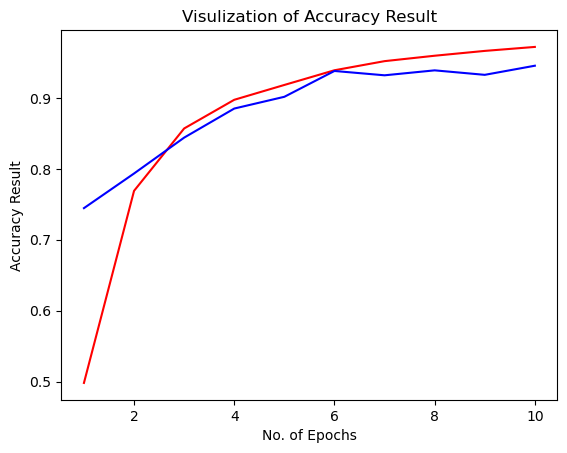

In [28]:
epochs = [i for i in range(1 , 11)]
plt.plot(epochs , training_history.history['accuracy'] , color = 'red' , label = 'Training Accuracy')
plt.plot(epochs , training_history.history['val_accuracy'] , color = 'blue' , label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.show()

## Some Other Metrics For Model Evaluation

In [29]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [85]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'Tomato_Dataset\Plant_Diseases\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 4585 files belonging to 10 classes.


In [86]:
y_pred = model.predict(test_set)
y_pred , y_pred.shape

144/144 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step


(array([[9.9999642e-01, 4.0726096e-07, 5.4296024e-08, ..., 2.7545952e-06,
         1.2902149e-11, 2.5674715e-10],
        [1.0000000e+00, 4.6505858e-11, 1.6400705e-12, ..., 1.1921894e-10,
         4.7281339e-17, 1.7778779e-15],
        [1.0000000e+00, 1.7220876e-11, 4.2021248e-12, ..., 1.8623911e-10,
         3.2549949e-16, 9.0175534e-15],
        ...,
        [1.7842348e-08, 6.1628685e-10, 5.9463247e-05, ..., 3.8110676e-10,
         1.3897200e-08, 9.9993992e-01],
        [9.8690089e-06, 5.9166879e-08, 3.9627477e-05, ..., 1.6997838e-07,
         1.3491359e-06, 9.9989736e-01],
        [6.2124944e-10, 2.9277392e-12, 4.9187300e-08, ..., 3.1980850e-12,
         3.6214629e-10, 9.9999881e-01]], dtype=float32),
 (4585, 10))

In [87]:
predicted_categories = tf.argmax(y_pred , axis = 1)
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [88]:
true_categories = tf.concat([y for x , y in test_set] ,axis = 0)
true_categories

<tf.Tensor: shape=(4585, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [89]:
Y_true = tf.argmax(true_categories , axis = 1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(Y_true , predicted_categories , target_names = class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.98      0.96       425
                        Tomato___Early_blight       0.86      0.91      0.89       480
                         Tomato___Late_blight       0.94      0.92      0.93       463
                           Tomato___Leaf_Mold       0.92      0.97      0.94       470
                  Tomato___Septoria_leaf_spot       0.92      0.87      0.89       436
Tomato___Spider_mites Two-spotted_spider_mite       0.94      0.98      0.96       435
                         Tomato___Target_Spot       0.99      0.85      0.92       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       490
                 Tomato___Tomato_mosaic_virus       0.99      0.98      0.99       448
                             Tomato___healthy       0.98      0.99      0.98       481

                                     accu

## Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true , predicted_categories)
cm

array([[416,   1,   1,   0,   5,   0,   0,   2,   0,   0],
       [ 14, 439,  19,   3,   4,   1,   0,   0,   0,   0],
       [  0,  20, 426,   4,  10,   1,   0,   1,   0,   1],
       [  0,  11,   1, 456,   1,   1,   0,   0,   0,   0],
       [  6,  18,   4,  28, 380,   0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   1, 428,   2,   1,   1,   0],
       [  6,  14,   0,   2,  11,  21, 390,   0,   3,  10],
       [  1,   1,   0,   0,   1,   2,   0, 485,   0,   0],
       [  0,   3,   0,   1,   1,   2,   0,   0, 441,   0],
       [  0,   0,   1,   2,   0,   1,   2,   0,   1, 474]], dtype=int64)

In [93]:
cm.shape

(10, 10)

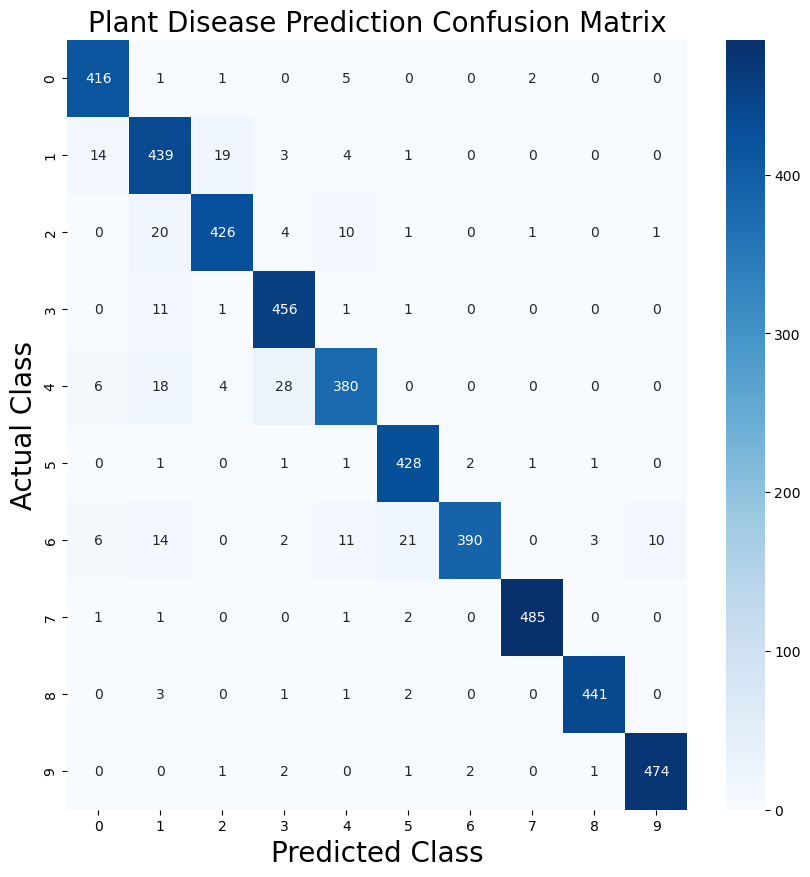

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=20)
plt.show()

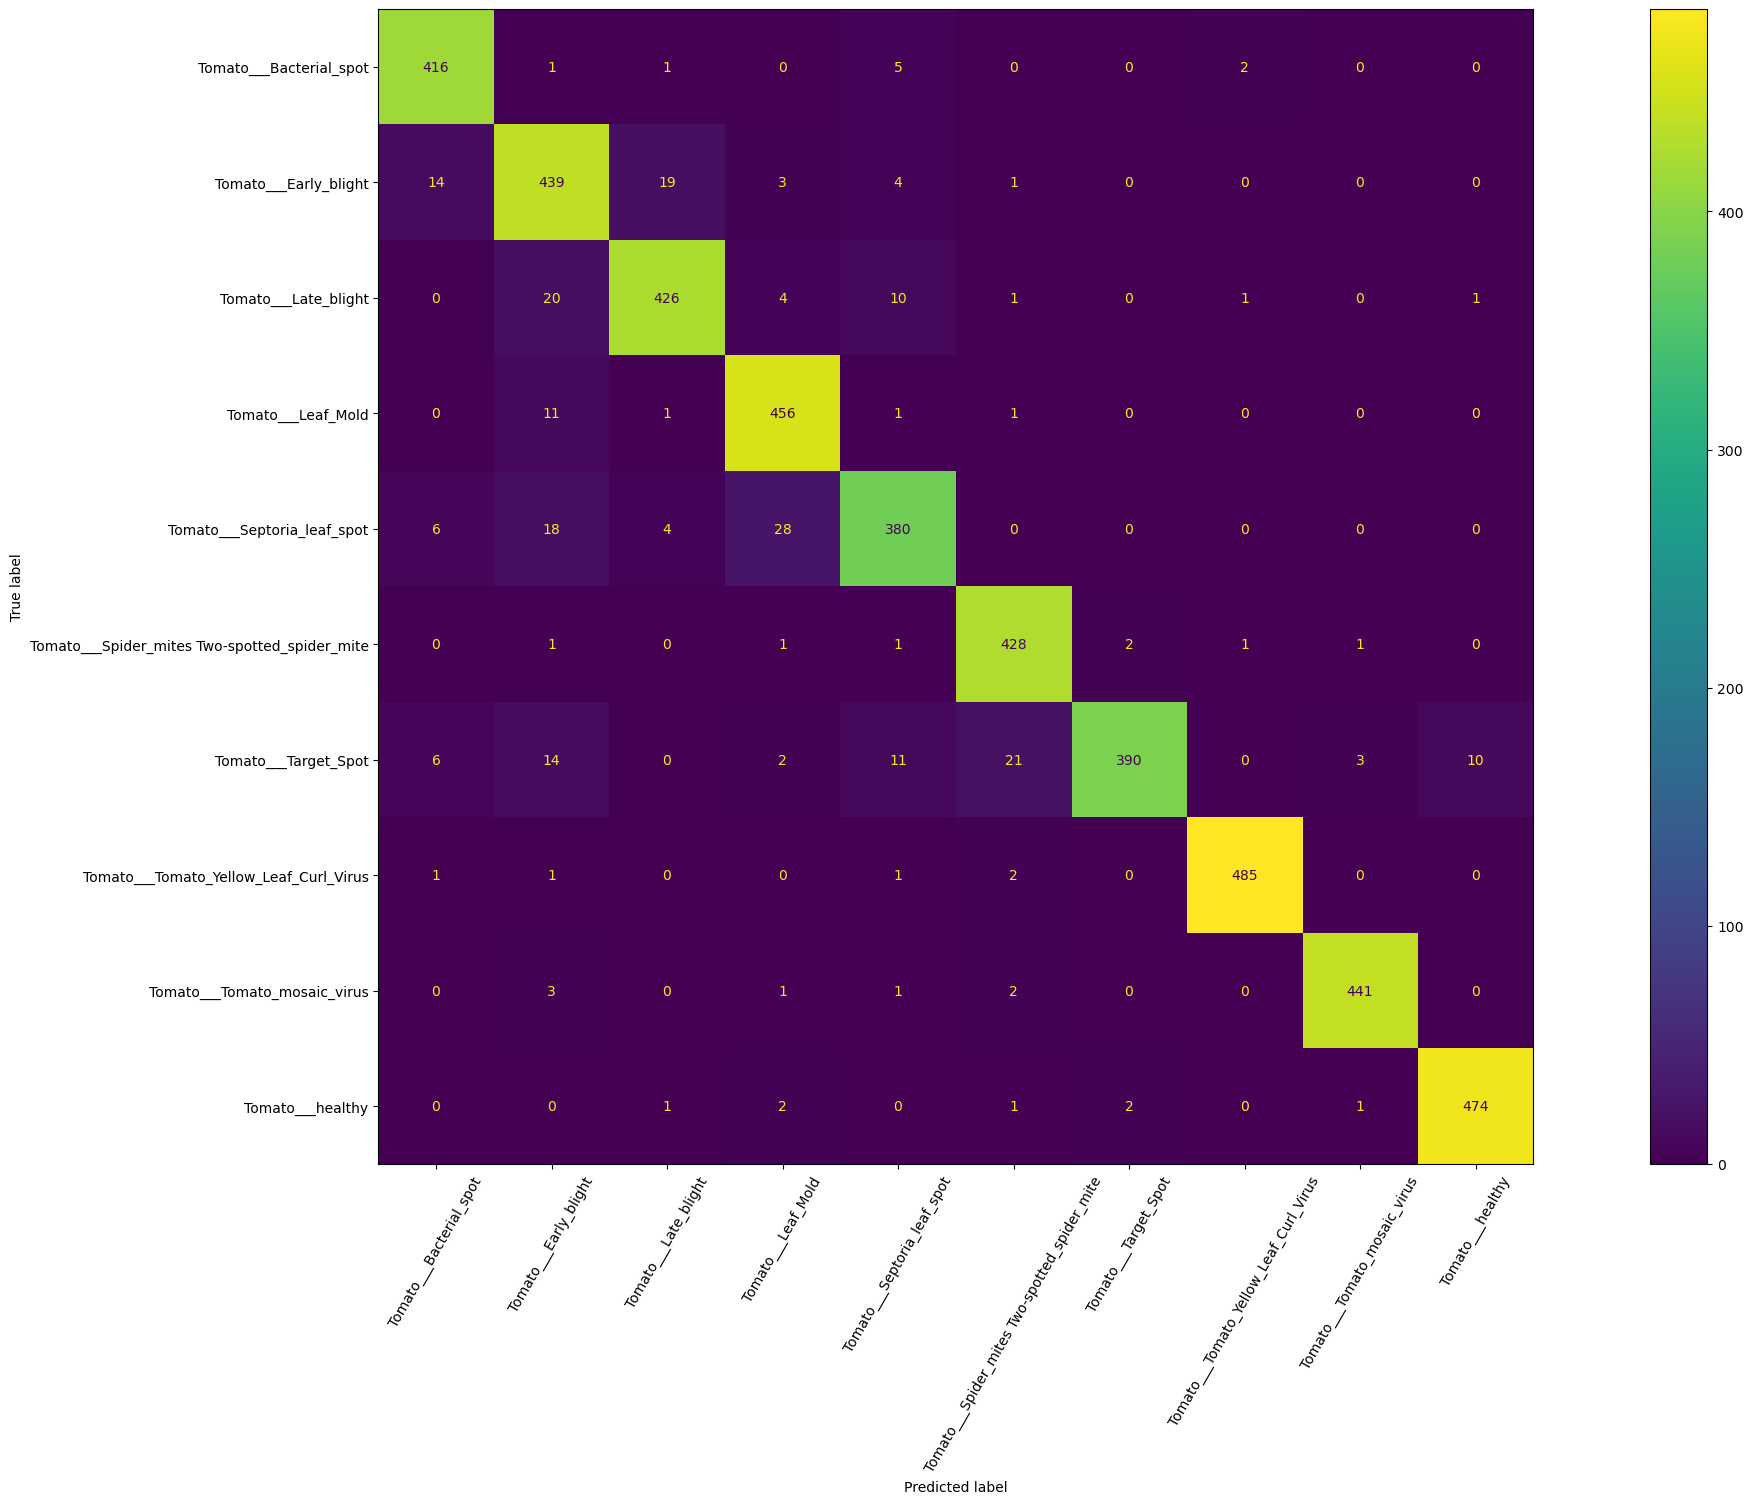

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(30, 15))
disp.plot(ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=60)  # Set the angle for the x-axis labels

# Show the plot
plt.show()

# Visualization Single Image of Test set

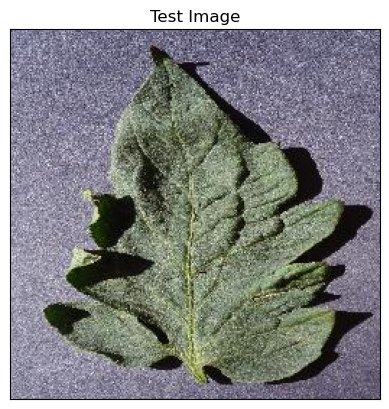

In [96]:
import cv2
import matplotlib.pyplot as plt

image_path = r"Tomato_Dataset\Plant_Diseases\valid\Tomato___healthy\ed6f80a2-c69f-4d33-ad3d-ef2186aa1db1___RS_HL 9669.jpg"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()


### Testing Model

In [97]:
import numpy as np

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

print(input_arr.shape)


(1, 128, 128, 3)


In [98]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


(array([[2.6051356e-16, 3.4564561e-19, 8.0036915e-11, 1.3722470e-09,
         6.4053983e-12, 2.9689458e-16, 3.9105510e-11, 9.4219975e-20,
         5.3955784e-18, 1.0000000e+00]], dtype=float32),
 (1, 10))

In [99]:
result_index = np.argmax(prediction)
result_index

9

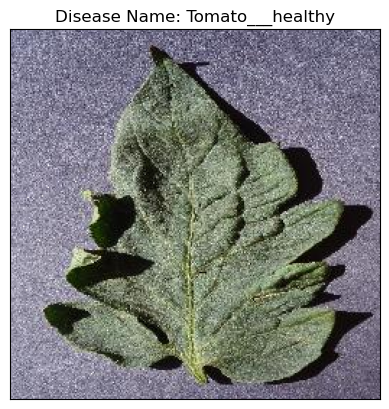

In [100]:
# Assuming class_name is a list of class labels
model_prediction = class_name[result_index]  # Use indexing instead of calling as a function

# Displaying the result
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")  # Use f-string for better formatting
plt.xticks([])
plt.yticks([])
plt.show()
